# Building with LangGraph

## Resources

- [Youtube: Flow Engineering with LangChain/LangGraph and CodiumAI](https://www.youtube.com/watch?v=eBjxz7qrNBs)
- [LangGraph - quickStart](https://langchain-ai.github.io/langgraph/#overview)
- [LangGraph - Tutorials](https://langchain-ai.github.io/langgraph/tutorials/)

In [1]:
%%capture
!pip install --upgrade -q openai langchain langchain-openai langchain-community langgraph langgraph-checkpoint-sqlite

## Building a ChatBot

In [2]:
from langgraph.graph import StateGraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
import getpass
import os

In [3]:
os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OPENAI_API_KEY: ")

Enter your OPENAI_API_KEY:  ········


In [ ]:
class State(TypedDict):
  messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

llm = ChatOpenAI(model_name="gpt-4o-mini", temperature=0.5)

# defining the chatbot node
def chatbot(state: State) -> State:
  return {"messages": [llm.invoke(state["messages"])]}


# adding the node to the graph
graph_builder.add_node("chatbot", chatbot)

# setting the entry and the finish points
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")

# building the graph
graph = graph_builder.compile()

The code snippet defines a system for constructing and using a stateful graph of operations, leveraging components like `State`, a state machine graph builder, and a chatbot function. Below is a breakdown of each part:

---

### **1. State Definition**

```python
class State(TypedDict):
  messages: Annotated[list, add_messages]
```

- `State` is a type definition using Python's `TypedDict` from the `typing` module, which allows you to define dictionary-like structures with specific key-value types.
- `messages`:
  - Its type is `list`, constrained or further described by an `Annotated` type.
  - The `Annotated` type allows adding metadata (like `add_messages`) to the field. While the specific functionality of `add_messages` isn't detailed here, it could be a validator, schema descriptor, or a helper function.

---

### **2. Graph Builder Initialization**

```python
graph_builder = StateGraph(State)
```

- `StateGraph` appears to be a utility class (not part of standard Python) for creating and managing a directed graph of states or operations.
- The graph operates on data structures conforming to the `State` type, ensuring consistency throughout the graph nodes.

---

### **3. Language Model Setup**

```python
llm = ChatOpenAI(model_name="gpt-4o-mini", temperature=0)
```

- `ChatOpenAI` is initialized, representing a large language model interface (likely OpenAI’s API).
- Parameters:
  - `model_name="gpt-4o-mini"` specifies the model variant. `gpt-4o-mini` suggests a lightweight or specialized version of GPT-4o.
  - `temperature=0` ensures deterministic outputs, meaning the same input will always produce the same response.

---

### **4. Chatbot Node Definition**

```python
def chatbot(state: State) -> State:
  return {"messages": [llm.invoke(state["messages"])]}
```

- This defines a function (`chatbot`) to be used as a node in the graph.
- Inputs:
  - `state`: A dictionary conforming to the `State` schema. Specifically, it will contain a `messages` key.
- Outputs:
  - A dictionary with a single key `messages`. The value is the result of invoking the `llm` object with the provided `state["messages"]`.
  - The `llm.invoke()` method is presumably used to pass the `state["messages"]` list to the language model and receive its response.

---

### **5. Adding the Chatbot Node to the Graph**

```python
graph_builder.add_node("chatbot", chatbot)
```

- The `chatbot` function is added as a node in the `graph_builder`, with the label `"chatbot"`.
- This means the `chatbot` node will execute its logic whenever invoked by the graph.

---

### **6. Entry and Finish Points**

```python
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")
```

- The `entry point` marks the node where the graph begins processing. Here, it’s set to the `"chatbot"` node.
- The `finish point` marks the final node to complete graph execution, also set to the `"chatbot"` node in this case.

---

### **7. Compiling the Graph**

```python
graph = graph_builder.compile()
```

- The graph is finalized (compiled) for execution. This step prepares the defined nodes and logic into a runnable pipeline or workflow.

---

### **Key Concepts**

1. **State Management:**
   - The `State` object holds the inputs and outputs for graph operations. Each node (like `chatbot`) modifies or augments this state.

2. **Graph-Based Workflow:**
   - Using `StateGraph`, the operations (`chatbot` in this case) are structured as nodes in a graph, facilitating modular and reusable workflows.

3. **Language Model Integration:**
   - The chatbot node integrates a language model (`llm`) to process and respond to inputs.

---

### **Example Execution**
Suppose `state` is initialized as:

```python
state = {"messages": ["Hello, how can I help you?"]}
```

When the graph executes:
1. The `state["messages"]` list is passed to the `chatbot` node.
2. The `llm.invoke()` method processes the messages and generates a response.
3. The updated state is output as:

```python
{"messages": ["<response from GPT-4o-mini>"]}
```

---

### **Potential Use Case**
This setup can be part of a larger system where:
- The graph orchestrates complex workflows involving multiple nodes.
- The chatbot node acts as a dynamic conversational agent integrated into the workflow.


## Visualizing the Graph

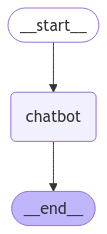

In [ ]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [4]:
#@title Draw graph using ascii
!pip install -q grandalf

In [ ]:
print(graph.get_graph().draw_ascii())

+-----------+  
| __start__ |  
+-----------+  
      *        
      *        
      *        
 +---------+   
 | chatbot |   
 +---------+   
      *        
      *        
      *        
 +---------+   
 | __end__ |   
 +---------+   


## Running the ChatBot

In [ ]:
while True:
    user_input = input('User: ')
    if user_input.lower() in ['quit', 'exit', 'bye',  'q']:
        print('Goodbye!')
        break

    for event in graph.stream({'messages': ('user', user_input)}):
        for value in event.values():
            print(f'Assistant: {value["messages"][-1].content}')
            print('-' * 20)

User: Paris is ...
Assistant: Paris is the capital city of France, known for its rich history, art, culture, and architecture. It is often referred to as "The City of Light" (La Ville Lumière) and is famous for landmarks such as the Eiffel Tower, the Louvre Museum, Notre-Dame Cathedral, and the Champs-Élysées. Paris is also renowned for its cuisine, fashion, and vibrant neighborhoods like Montmartre and Le Marais. The city has played a significant role in various movements, including the Enlightenment and the arts, making it a cultural hub in Europe and around the world.
--------------------
User: History of Notre-Dame
Assistant: Notre-Dame de Paris, one of the most famous Gothic cathedrals in the world, has a rich and complex history that dates back to the early 12th century. Here’s an overview of its history:

### Early History
- **Foundation**: The site of Notre-Dame was originally occupied by a Gallo-Roman temple dedicated to Jupiter. In the early Christian period, a church was bui

## Tavily AI

- https://tavily.com/
- https://docs.tavily.com/docs/python-sdk/tavily-search/getting-started

In [5]:
%%capture
!pip install -q tavily-python

In [6]:
os.environ["TAVILY_API_KEY"] = getpass.getpass("Enter your TAVILY_API_KEY: ")

Enter your TAVILY_API_KEY:  ········


In [ ]:
from tavily import TavilyClient

# initializing a Tavily client
client = TavilyClient()
response = client.search(query="EUFA EURO 2024 FINA")
response

{'query': 'EUFA EURO 2024 FINA',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'UEFA Euro 2024 final - Wikipedia',
   'url': 'https://en.wikipedia.org/wiki/UEFA_Euro_2024_Final',
   'content': "The UEFA Euro 2024 final was a football match that determined the winners of UEFA Euro 2024.The match was the seventeenth final of the European Championship, a quadrennial tournament contested by the men's national teams of the member associations of UEFA to decide the champions of Europe. The match was held at the Olympiastadion in Berlin, Germany, on 14 July 2024, and was contested by Spain",
   'score': 0.87779135,
   'raw_content': None},
  {'title': 'EURO 2024 - UEFA.com',
   'url': 'https://www.uefa.com/euro2024/',
   'content': "Group A Live now 07:55  Live 17/07/2024 Highlights: Spain 2-1 England ----------------------------- 05:53  Live 17/07/2024 Highlights: Spain 2-1 France ---------------------------- 05:57  Live 17/07/2024 Highlights: Netherlan

In [ ]:
for result in response['results']:
    print(f"Title: {result['title']}, URL: {result['url']}")

Title: UEFA Euro 2024 final - Wikipedia, URL: https://en.wikipedia.org/wiki/UEFA_Euro_2024_Final
Title: EURO 2024 - UEFA.com, URL: https://www.uefa.com/euro2024/
Title: Euro 2024 final: Spain tops England to win dramatic, historic 4th title, URL: https://sports.yahoo.com/live/euro-2024-final-spain-tops-england-to-win-dramatic-historic-4th-title-180013299.html
Title: Spain wins Euro 2024, defeating England 2-1 in a dramatic final to ..., URL: https://www.cnn.com/2024/07/14/sport/spain-england-euro-2024-final-spt-intl/index.html
Title: EURO 2024 final: Who was in it? When and where was it?, URL: https://www.uefa.com/euro2024/news/0284-18bb952a9458-2a9e1ff202c4-1000--euro-2024-final-who-was-in-it-when-and-where-was-it/


In [ ]:
response = client.search(
    query='What are LLM agents?',
    search_depth='advanced',
    max_results=7,
    include_images=True,
    include_answer=True,
    include_raw_content=False
)
response

{'query': 'What are LLM agents?',
 'follow_up_questions': None,
 'answer': 'LLM agents, or Large Language Model agents, are entities that are based on LLMs and are capable of manipulating their environment in some way. They typically consist of components such as a core for processing, memory, planning skills, and tool use. LLM agents have the ability to handle a wide range of tasks and interactions, making them valuable in various applications where language models can not only provide information but also perform actions autonomously.',
 'images': ['https://sp-ao.shortpixel.ai/client/to_webp,q_glossy,ret_img,w_1080,h_1080/https://contenteratechspace.com/wp-content/uploads/2024/07/llm-agents.png',
  'https://promptengineering.org/content/images/2023/08/Prompt-engineering---Large-Language-Model-LLM--Autonomous-Agent-Structure---PromptEngineering.org.jpg',
  'https://promptengineering.org/content/images/2023/07/Prompt-engineering---Large-Language-Model-LLM--Autonomous-Agent.jpg',
  'htt

In [ ]:
answer = client.qna_search(query='Who won the UEFA Champions League in 2024?')
print(answer)

Real Madrid won the UEFA Champions League in 2024 by defeating Borussia Dortmund 2-0 in the final held at Wembley Stadium on June 1st.


In [ ]:
from langchain.adapters.openai import convert_openai_messages
from langchain_openai import ChatOpenAI

query = 'What is the "Reflection & Critique" pattern used in agentic applications and LangGraph?'

response = client.search(query, max_results=5, search_depth='advanced')['results']
response

[{'title': 'EOF',
  'url': 'http://www.google.com/search?hl=en&q=what+is+the+"reflection+&+critique"+pattern+used+in+agentic+applications+and+langgraph?',
  'content': "https://www.google.com/search?hl=en&q=what+is+the+%22reflection+&+critique%22+pattern+used+in+agentic+applications+and+langgraph? Our systems have detected unusual traffic from your computer network. This page checks to see if it's really you sending the requests, and not a robot. This page appears when Google automatically detects requests coming from your computer network which appear to be in violation of the Terms of Service. This traffic may have been sent by malicious software, a browser plug-in, or a script that sends automated requests. If you share your network connection, ask your administrator for help — a different computer using the same IP address may be responsible. Sometimes you may be asked to solve the CAPTCHA if you are using advanced terms that robots are known to use, or sending requests very quickl

In [ ]:
# setting up the OpenAI API prompt
prompt = [
    {
        'role': 'system',
        'content': f'''You are an AI critical thinker research assistant.
        Your sole purpose is to write well written, objective and structured reports on given text.'''
    },
    {
        'role': 'user',
        'content': f'''Information: """{response}"""
        Using the above information, answer the following query: """{query}""" in a detailed report'''
    }
]
lc_messages = convert_openai_messages(prompt)
lc_messages

[SystemMessage(content='You are an AI critical thinker research assistant. \n        Your sole purpose is to write well written, objective and structured reports on given text.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Information: """[{\'title\': \'EOF\', \'url\': \'http://www.google.com/search?hl=en&q=what+is+the+"reflection+&+critique"+pattern+used+in+agentic+applications+and+langgraph?\', \'content\': "https://www.google.com/search?hl=en&q=what+is+the+%22reflection+&+critique%22+pattern+used+in+agentic+applications+and+langgraph? Our systems have detected unusual traffic from your computer network. This page checks to see if it\'s really you sending the requests, and not a robot. This page appears when Google automatically detects requests coming from your computer network which appear to be in violation of the Terms of Service. This traffic may have been sent by malicious software, a browser plug-in, or a script that sends automated requests. If you sha

In [ ]:
response = ChatOpenAI(model='gpt-4o-mini').invoke(lc_messages)
print(response.content)

# Report on the "Reflection & Critique" Pattern in Agentic Applications and LangGraph

## Introduction
The "Reflection & Critique" pattern is an important concept used in various agentic applications, particularly within the LangGraph framework. This report aims to elucidate the purpose, applications, and implications of this pattern based on the provided information.

## Definition and Purpose
The "Reflection & Critique" pattern involves a systematic approach for evaluation and improvement within learning and interactive environments. It encourages users—whether they are students, educators, or developers—to actively reflect on their experiences and critically assess their understanding and the applications they are engaged with. This process not only reinforces learning but also fosters deeper cognitive engagement and self-awareness.

## Context of Use
### Agentic Applications
Agentic applications are designed to empower users by granting them agency in their learning processes. Thes

In [ ]:
from IPython.display import Markdown, display

display(Markdown(response.content))

# Report on the "Reflection & Critique" Pattern in Agentic Applications and LangGraph

## Introduction
The "Reflection & Critique" pattern is an important concept used in various agentic applications, particularly within the LangGraph framework. This report aims to elucidate the purpose, applications, and implications of this pattern based on the provided information.

## Definition and Purpose
The "Reflection & Critique" pattern involves a systematic approach for evaluation and improvement within learning and interactive environments. It encourages users—whether they are students, educators, or developers—to actively reflect on their experiences and critically assess their understanding and the applications they are engaged with. This process not only reinforces learning but also fosters deeper cognitive engagement and self-awareness.

## Context of Use
### Agentic Applications
Agentic applications are designed to empower users by granting them agency in their learning processes. These applications often utilize AI and interactive technologies to create personalized learning experiences. The "Reflection & Critique" pattern is integral to these applications as it allows users to engage in metacognitive strategies, enabling them to assess their learning outcomes and refine their approaches.

### LangGraph Framework
LangGraph, which is a part of the LangChain ecosystem, aims to provide tools and methodologies for developing language-based applications. Within this framework, the "Reflection & Critique" component is applied to help users, particularly children, make connections between theoretical lessons—such as those derived from literature (e.g., "The Little Prince")—and their practical applications in real life. This encourages a holistic understanding and fosters the ability to apply learned concepts in varied contexts.

## Practical Applications
The practical applications of the "Reflection & Critique" pattern can be seen in several areas, including:

1. **Educational Settings**: Educators can use this pattern to guide students in reflecting on their learning experiences, thus enhancing retention and comprehension.
2. **Development of AI Systems**: Developers can implement this pattern to evaluate the performance of AI models, allowing for continuous improvement based on user feedback.
3. **Personal Development**: Individuals can use reflective practices to assess their personal growth and learning, which is particularly beneficial in self-directed learning environments.

## Implementation Strategies
- **Structured Reflection Prompts**: Incorporating specific questions or prompts that encourage users to think critically about their experiences.
- **Feedback Mechanisms**: Providing channels for users to offer feedback on their interactions, which can be analyzed for insights into improving both the applications and user experience.
- **Workshops and Training**: Facilitating sessions aimed at teaching users how to effectively engage in reflection and critique within their learning processes.

## Conclusion
The "Reflection & Critique" pattern is a vital component of agentic applications and the LangGraph framework. By fostering an environment of reflection and critical thinking, this pattern enhances learning outcomes and empowers users to take charge of their educational journeys. The integration of this pattern into various applications not only helps in personal growth but also in the continual advancement of AI and interactive technologies. 

For further exploration of the "Reflection & Critique" pattern and its applications, resources such as LangGraph's official documentation can be consulted.

## Enhancing the ChatBot with Tools

In [7]:
#@title Defining the tools
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=5)
tools = [tool]

In [8]:
response = tool.invoke("What is Machine Learning?")
response

[{'url': 'https://www.geeksforgeeks.org/ml-machine-learning/',
  'content': 'Machine learning is a branch of artificial intelligence that enables algorithms to learn from data and make predictions without explicit programming. Learn about the difference between machine learning and traditional programming, the types of machine learning, the applications of machine learning, and the limitations of machine learning.'},
 {'url': 'https://www.ibm.com/topics/machine-learning',
  'content': 'Machine learning is a branch of\xa0artificial intelligence (AI)\xa0and computer science which focuses on the use of data and algorithms to imitate the way that humans learn, gradually improving its accuracy.\n The system\xa0used reinforcement learning\xa0to learn when to attempt an answer (or question, as it were), which square to select on the board, and how much to wager—especially on daily doubles.\n Download "Machine learning for Dummies"\nExplore Gen AI for developers\nUC\xa0Berkeley\xa0(link reside

In [9]:
from langgraph.graph import StateGraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults

# --- new import
from langgraph.prebuilt import ToolNode, tools_condition

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

tool = TavilySearchResults(max_results=5)
tools = [tool]

llm = ChatOpenAI(model_name='gpt-4o-mini', temperature=0.5)

# tell the LLM which tools it can call
llm_with_tools = llm.bind_tools(tools)

# change the chatbot() node function. Use llm_with_tools instead of llm.
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)

# --- add this:
# run the tools if they are called by adding the tools to a new node.
# This node runs the tools requested in the last AIMessage.
tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)
# ---

# --- add this
# define the conditional_edges.
# we'll use the prebuilt tools_condition in the conditional_edge to route to the ToolNode if the last message has tool calls,
# otherwise, route to the end.
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# ---

# any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")

graph_builder.set_entry_point("chatbot")

# we don't need to explicitly set a finish_point because our graph already has a way to finish!
# graph_builder.set_finish_point("chatbot")

graph = graph_builder.compile()

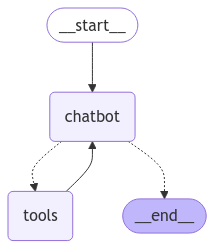

In [10]:
# Let's visualize the graph we've built. We'll use the same code as in the previous video.
from IPython.display import Image, Markdown, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
while True:
    user_input = input('User: ')
    if user_input.lower() in ['quit', 'exit', 'bye',  'q']:
        print('Goodbye!')
        break
        
    for event in graph.stream({'messages': ('user', user_input)}):
        for value in event.values():
            print('Assistant: ', value['messages'][-1].content)
        print('-' * 100)

User:  NVIDIA A100 vs. NVIDIA RTX A6000


Assistant:  
----------------------------------------------------------------------------------------------------
Assistant:  [{"url": "https://www.bhphotovideo.com/c/product/1607840-REG/pny_technologies_vcnrtxa6000_pb_nvidia_rtx_a6000_graphic.html", "content": "Buy PNY NVIDIA RTX A6000 Graphics Card featuring 10752 CUDA Cores, Ampere Architecture, 48GB of ECC GDDR6 VRAM, 384-Bit Memory Interface, DisplayPort 1.4a, PCI Express 4.0 x16 Interface, Blower-Style Fan Cooler. ... PNY RTX A6000 Specs. Key Specs. GPU Model: NVIDIA RTX 6000. Stream Processors: 10,752 CUDA Cores. Dedicated AI Cores: Yes"}, {"url": "https://www.techpowerup.com/gpu-specs/rtx-a6000.c3686", "content": "The RTX A6000 is an enthusiast-class professional graphics card by NVIDIA, launched on October 5th, 2020. Built on the 8 nm process, and based on the GA102 graphics processor, the card supports DirectX 12 Ultimate. The GA102 graphics processor is a large chip with a die area of 628 mm² and 28,300 million transistors."

User:  What are LLM agents?


Assistant:  
----------------------------------------------------------------------------------------------------
Assistant:  [{"url": "https://www.rapidinnovation.io/post/llm-agents-the-complete-guide", "content": "1.1 Definition and Concept of LLM Agents. LLM agents refer to systems or applications that utilize large language models to perform tasks involving natural language understanding and generation. These agents are built on complex algorithms trained on vast amounts of text data, enabling them to comprehend and produce language in a way that"}, {"url": "https://www.sapien.io/blog/what-are-llm-agents", "content": "LLM agents are AI-powered autonomous systems that leverage large language models for enhanced decision-making. Types of LLM agents include rule-based, learning-based, and hybrid models. Key features include natural language understanding, contextual awareness, adaptability, and tool integration."}, {"url": "https://www.castordoc.com/ai-strategy/understanding-llm-agent

User:  quit


Goodbye!


## Adding Memory to the ChatBot

In [16]:
from langgraph.graph import StateGraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_community.tools.tavily_search import TavilySearchResults

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

tool = TavilySearchResults(max_results=3)
tools = [tool]

llm = ChatOpenAI(model_name='gpt-4o-mini', temperature=0.5)
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    return {'messages': [llm_with_tools.invoke(state['messages'])]}

graph_builder.add_node('chatbot', chatbot)
tool_node = ToolNode(tools=[tool])
graph_builder.add_node('tools', tool_node)

graph_builder.add_conditional_edges(
    'chatbot',
    tools_condition,
)

graph_builder.add_edge('tools', 'chatbot')
graph_builder.set_entry_point('chatbot')

In [17]:
from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.checkpoint.memory import MemorySaver ### fix

memory = SqliteSaver.from_conn_string(':memory:')
graph = graph_builder.compile(checkpointer=MemorySaver()) ### fix

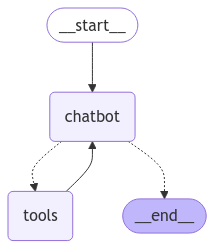

In [18]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [19]:
config = {'configurable': {'thread_id': '1'}}

In [20]:
prompt = 'What is the lastest AI model developed by OpenAI?'

# streaming the events. 
events = graph.stream(
    {'messages': [('user', prompt)]}, config, stream_mode='values'
)

for event in events:
    event['messages'][-1].pretty_print()

================================ Human Message =================================

What is the lastest AI model developed by OpenAI?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_3NpS3bjjXv5zJtMvIiAqXn0g)
 Call ID: call_3NpS3bjjXv5zJtMvIiAqXn0g
  Args:
    query: latest AI model developed by OpenAI
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://openai.com/o1/", "content": "Latest advancements. OpenAI o1; OpenAI o1-mini; GPT-4; GPT-4o mini; DALL·E 3; Sora; ChatGPT. For Everyone; For Teams; For Enterprises; ChatGPT login (opens in a new window) Download; API. ... We've developed a new series of AI models designed to spend more time thinking before they respond. Here is the latest news on o1 research, product and"}, {"url": "https://www.technologyreview.com/2024/09/17/1104004/why-openais-new-model-is-such-a-big-deal/", "cont

In [21]:
# It has memory!
prompt = 'What about Google?'
events = graph.stream(
    {'messages': [('user', prompt)]}, config, stream_mode='values'
)
for event in events:
    event['messages'][-1].pretty_print()

================================ Human Message =================================

What about Google?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_eLIWnjhXegk5tVybkmbLQPJ7)
 Call ID: call_eLIWnjhXegk5tVybkmbLQPJ7
  Args:
    query: latest AI model developed by Google
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://techcrunch.com/2024/12/04/deepminds-genie-2-can-generate-interactive-worlds-that-look-like-video-games/", "content": "DeepMind, Google's AI research org, has unveiled a model that can generate an \"endless\" variety of playable 3D worlds.. Called Genie 2, the model — the successor to DeepMind's Genie"}, {"url": "https://blog.google/technology/ai/google-gemini-ai/", "content": "This is a long-term commitment that requires building collaboratively, so we’re partnering with the industry and broader ecosystem on def

In [22]:
# It has memory!
prompt = 'And for AWS?'
events = graph.stream(
    {'messages': [('user', prompt)]}, config, stream_mode='values'
)
for event in events:
    event['messages'][-1].pretty_print()

================================ Human Message =================================

And for AWS?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_ZPHWuIByJTTkuppINlssNoc9)
 Call ID: call_ZPHWuIByJTTkuppINlssNoc9
  Args:
    query: latest AI model developed by AWS
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.techrepublic.com/article/amazon-nova-latest-ai-models/", "content": "Amazon Nova: the Latest AI Models Revolutionizing Business Amazon Nova: Inside the Latest AI Models Revolutionizing Business Amazon Nova: Inside the Latest AI Models Revolutionizing Business “Our new Amazon Nova models are intended to help with these challenges for internal and external builders and provide compelling intelligence and content generation while also delivering meaningful progress on latency, cost-effectiveness, customization, Retrieva

In [23]:
prompt = 'What did I ask you so far?'

events = graph.stream(
    {'messages': [('user', prompt)]}, config, stream_mode='values'
)
for event in events:
    event['messages'][-1].pretty_print()

================================ Human Message =================================

What did I ask you so far?
================================== Ai Message ==================================

So far, you have asked about the latest AI models developed by the following companies:

1. OpenAI
2. Google
3. AWS (Amazon Web Services)


In [24]:
prompt = 'Now provide detailed explanations how I can use each of these models from each service provider.'

events = graph.stream(
    {'messages': [('user', prompt)]}, config, stream_mode='values'
)
for event in events:
    event['messages'][-1].pretty_print()

================================ Human Message =================================

Now provide detailed explanations how I can use each of these models from each service provider.
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_x1t1aINgHQQFj1NaeUc4s3Hf)
 Call ID: call_x1t1aINgHQQFj1NaeUc4s3Hf
  Args:
    query: how to use OpenAI o1 model
  tavily_search_results_json (call_An1M2WaGLOu2O0NP2bDn6X4P)
 Call ID: call_An1M2WaGLOu2O0NP2bDn6X4P
  Args:
    query: how to use Google Gemini model
  tavily_search_results_json (call_4Dk3zbUNnM9kcZFvi6N9TTXv)
 Call ID: call_4Dk3zbUNnM9kcZFvi6N9TTXv
  Args:
    query: how to use AWS Nova model
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://ndurner.github.io/amazon-nova", "content": "Amazon Nova foundation model release Since there's community interest in how to set up AWS to use the new A

In [25]:
# NEW THREAD => no memory
config1 = {"configurable": {"thread_id": "10"}}

prompt = 'What did I ask you so far?'

events = graph.stream(
    {"messages": [("user", prompt)]}, config1, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What did I ask you so far?
================================== Ai Message ==================================

You haven't asked me anything yet in this conversation. How can I assist you today?


In [26]:
snapshot = graph.get_state(config)
snapshot

StateSnapshot(values={'messages': [HumanMessage(content='What is the lastest AI model developed by OpenAI?', additional_kwargs={}, response_metadata={}, id='0c018b21-d224-41a1-8c4a-9d3783c7ce31'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_3NpS3bjjXv5zJtMvIiAqXn0g', 'function': {'arguments': '{"query":"latest AI model developed by OpenAI"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 91, 'total_tokens': 115, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-a38cb64c-b5fc-4454-9d52-6a0b4ee5badc-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'quer

In [27]:
snapshot.next

()